In [75]:
import pandas as pd
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, accuracy_score, f1_score
%matplotlib inline

In [2]:
macro_df = pd.read_excel('./data/scenario.xlsx', sheetname='macro')

In [3]:
inflation_df = pd.read_excel('./data/scenario.xlsx', sheetname='inflation')

In [4]:
money_df = pd.read_excel('./data/scenario.xlsx', sheetname='money')

In [5]:
currency_df = pd.read_excel('./data/scenario.xlsx', sheetname='currency')

In [6]:
price_df = pd.read_excel('./data/scenario.xlsx', sheetname='price')

In [7]:
df = macro_df
df['CPI'] = inflation_df['CPI']
df['M2'] = money_df['M2']

In [8]:
df['stock'] = price_df['000001.SH'].resample('M').last()
df['currency'] = currency_df['CNY'].resample('M').last()
df['commodity'] = price_df['CCFI.WI'].resample('M').last()

In [9]:
df.dropna().head()

,工业增加值,CPI,M2,stock,currency,commodity
1996-01-31,16.9,9.0,25.9,537.35,8.3138,879.0336
1996-02-29,12.2,9.3,27.2,552.94,8.3211,879.0733
1996-03-31,12.2,9.8,28.3,556.39,8.3338,859.4159
1996-04-30,13.7,9.7,28.5,681.16,8.3301,859.7720
1996-05-31,13.1,8.9,28.4,643.65,8.3255,825.8901


In [10]:
df = df.dropna()

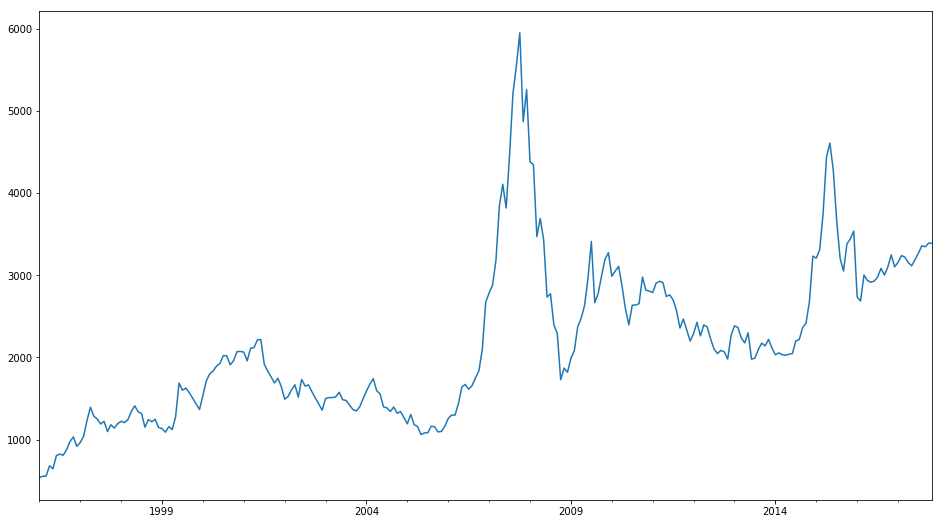

In [11]:
plt.figure(figsize=(16, 9))
df['stock'].plot()

In [12]:
X = pd.DataFrame(index=df.index, columns=df.columns)
for date in df.index:
    past = df[df.index <= date]
    X.loc[date] = (df.loc[date] - past.mean()) / past.std()
X = X.loc[X.index[24:]]

In [14]:
X.head()

,工业增加值,CPI,M2,stock,currency,commodity
1998-01-31,-3.66426,-1.55735,-1.18198,0.934958,-1.35741,-1.56872
1998-02-28,-0.804885,-1.5631,-1.2643,0.841676,-1.26365,-1.48136
1998-03-31,-0.954439,-1.25923,-1.44904,0.950491,-1.18251,-1.24915
1998-04-30,-1.52125,-1.46215,-1.51591,1.28193,-1.20967,-1.32693
1998-05-31,-1.1804,-1.55979,-1.27141,1.45928,-1.08273,-1.6599


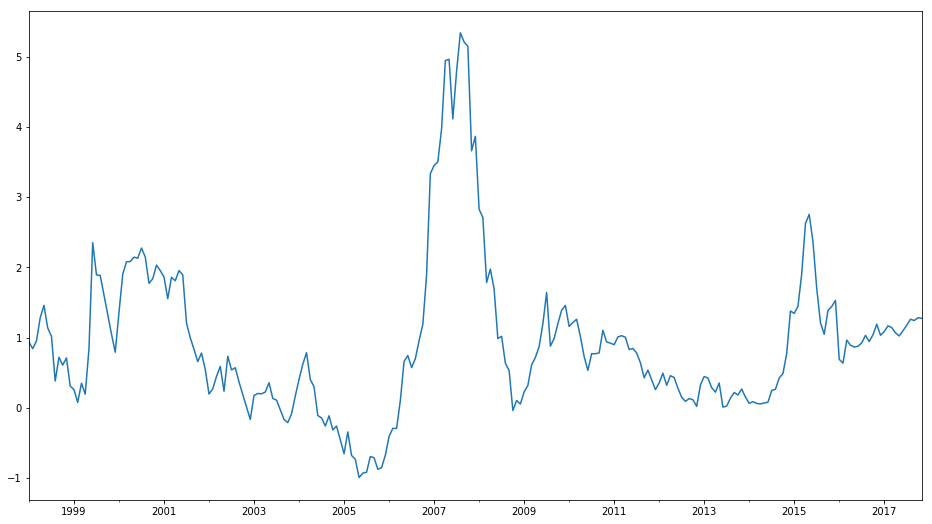

In [13]:
plt.figure(figsize=(16, 9))
X['stock'].plot()

In [49]:
X['label'] = 0
X.loc[((X.index >= '2007-01-01') & (X.index <= '2007-10-01')) |
      ((X.index >= '2009-01-01') & (X.index <= '2009-08-01')), 'label'] = 1

In [50]:
X.head()

,工业增加值,CPI,M2,stock,currency,commodity,label
1998-01-31,-3.66426,-1.55735,-1.18198,0.934958,-1.35741,-1.56872,0
1998-02-28,-0.804885,-1.5631,-1.2643,0.841676,-1.26365,-1.48136,0
1998-03-31,-0.954439,-1.25923,-1.44904,0.950491,-1.18251,-1.24915,0
1998-04-30,-1.52125,-1.46215,-1.51591,1.28193,-1.20967,-1.32693,0
1998-05-31,-1.1804,-1.55979,-1.27141,1.45928,-1.08273,-1.6599,0


In [51]:
X, y = X[[col for col in X.columns if col != 'label']], X['label']

# 转换为分类问题

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

In [53]:
y_test[y_test != 0]

2007-02-28    1
2007-06-30    1
2009-06-30    1
2009-01-31    1
2007-01-31    1
2009-03-31    1
Name: label, dtype: int64

In [54]:
y_train[y_train != 0]

2007-08-31    1
2009-05-31    1
2009-02-28    1
2007-04-30    1
2007-05-31    1
2009-07-31    1
2007-09-30    1
2007-03-31    1
2009-04-30    1
2007-07-31    1
Name: label, dtype: int64

In [121]:
clf = SVC(kernel='linear', probability=True)

In [122]:
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [123]:
accuracy_score(y_train, clf.predict(X_train))

0.98750000000000004

In [124]:
accuracy_score(y_test, clf.predict(X_test))

0.96202531645569622

In [125]:
f1_score(y_train, clf.predict(X_train))

0.90000000000000002

In [126]:
f1_score(y_test, clf.predict(X_test))

0.66666666666666663

In [132]:
X_train['prob'] = clf.predict_proba(X_train)[:, 1]
X_test['prob'] = clf.predict_proba(X_test)[:, 1]

C:\Users\zhangyang01\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\zhangyang01\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [133]:
X_all = X_train.append(X_test).sort_index()

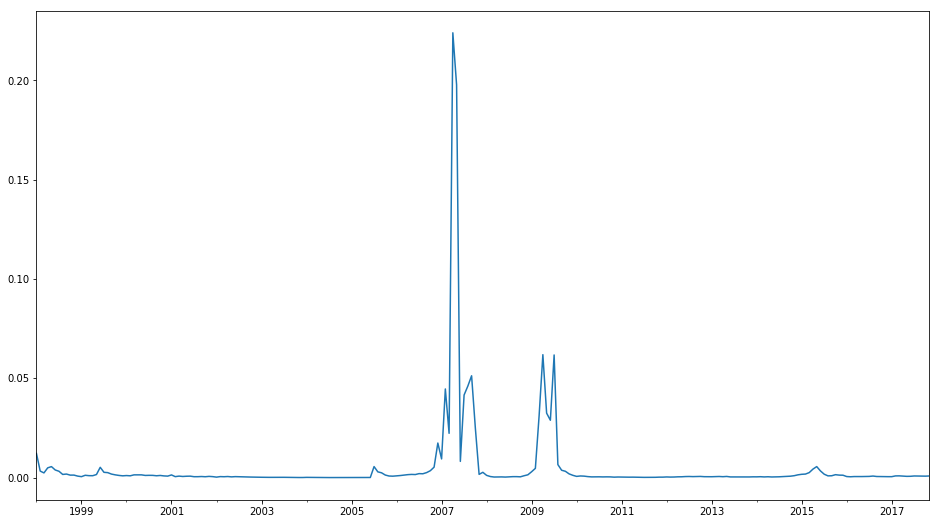

In [134]:
plt.figure(figsize=(16, 9))
X_all['prob'].plot()

In [135]:
clf = SVC(kernel='linear', probability=True)

In [136]:
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [138]:
X['prob'] = clf.predict_proba(X)[:, 1]

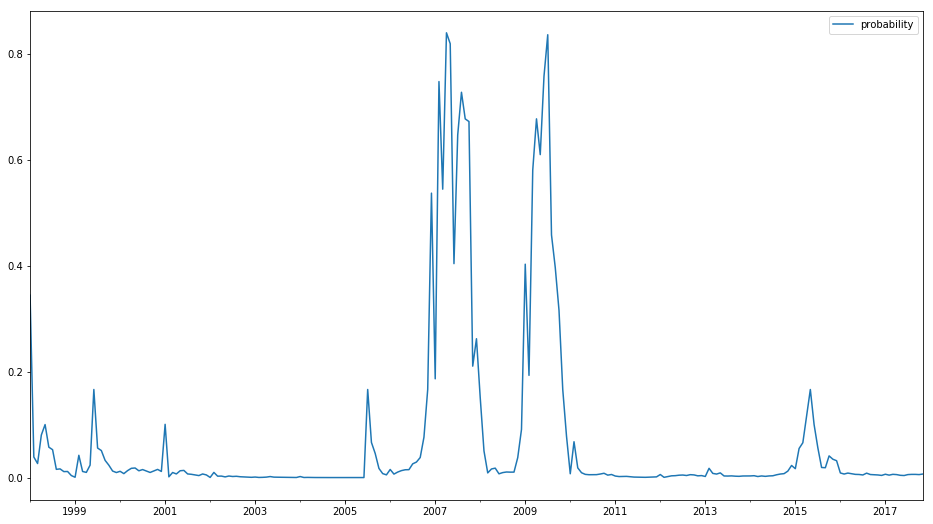

In [141]:
plt.figure(figsize=(16, 9))
X['prob'].plot(label='probability')
# X['stock'].plot(label='Stock')
plt.legend()